In [2]:
from hyperimpute.plugins.imputers import Imputers
from hyperimpute.utils.benchmarks import compare_models
import pandas as pd
import os
combined_data_lst = ['combined_oura.csv', 'user_581_survey_data.csv']
result_lst = []
for f in combined_data_lst:
    test_df = pd.read_csv(os.path.join(".", "dataset", f))

    # test_df.to_csv('./dataset/'+f)
    print(f)
    #test_df['d']
    imputer = Imputers().get("hyperimpute")
    # test_df.drop('d', inplace=True, axis=1)
    result_lst.append(compare_models(
        name="example",
        evaluated_model=imputer,
        X_raw=test_df,
        ref_methods=["ice", "missforest", "mice"],
        scenarios=["MAR"],
        miss_pct=[0.1, 0.3, 0.5, 0.7],
        n_iter=3,
    ))

combined_oura.csv
RMSE score


,Scenario,"miss_pct [0, 1]",Evaluated: hyperimpute,ice,missforest,mice
0,MAR,0.1,0.0738 +/- 0.0136,0.0808 +/- 0.0133,0.0863 +/- 0.0275,0.1238 +/- 0.0086
1,MAR,0.3,0.1018 +/- 0.0063,0.106 +/- 0.0163,0.1091 +/- 0.0013,0.1728 +/- 0.0349
2,MAR,0.5,0.1056 +/- 0.0158,0.1102 +/- 0.0091,0.1133 +/- 0.0164,0.2049 +/- 0.0193
3,MAR,0.7,0.1339 +/- 0.0445,0.1322 +/- 0.0101,0.1399 +/- 0.0488,0.2364 +/- 0.0367




Wasserstein score


,Scenario,"miss_pct [0, 1]",Evaluated: hyperimpute,ice,missforest,mice
0,MAR,0.1,0.0176 +/- 0.004,0.0204 +/- 0.0046,0.018 +/- 0.0044,0.0185 +/- 0.0024
1,MAR,0.3,0.0587 +/- 0.0031,0.0669 +/- 0.0073,0.0637 +/- 0.0038,0.0736 +/- 0.0327
2,MAR,0.5,0.0875 +/- 0.0176,0.0976 +/- 0.0133,0.0903 +/- 0.0166,0.1134 +/- 0.0246
3,MAR,0.7,0.1579 +/- 0.0455,0.1734 +/- 0.007,0.1508 +/- 0.0449,0.2078 +/- 0.0442


user_581_survey_data.csv
RMSE score


,Scenario,"miss_pct [0, 1]",Evaluated: hyperimpute,ice,missforest,mice
0,MAR,0.1,0.6272 +/- 0.1969,0.6075 +/- 0.2079,0.4186 +/- 0.1252,0.4713 +/- 0.2076
1,MAR,0.3,0.5508 +/- 0.0526,0.4503 +/- 0.0547,0.5123 +/- 0.0264,0.5254 +/- 0.0672
2,MAR,0.5,0.4837 +/- 0.0696,0.4957 +/- 0.0251,0.4531 +/- 0.0645,0.5071 +/- 0.0884
3,MAR,0.7,0.62 +/- 0.0555,0.6333 +/- 0.0498,0.5367 +/- 0.0473,1.5764 +/- 1.7477




Wasserstein score


,Scenario,"miss_pct [0, 1]",Evaluated: hyperimpute,ice,missforest,mice
0,MAR,0.1,0.0641 +/- 0.037,0.0641 +/- 0.037,0.0385 +/- 0.0355,0.0439 +/- 0.0159
1,MAR,0.3,0.141 +/- 0.037,0.1282 +/- 0.037,0.1218 +/- 0.0271,0.1254 +/- 0.0534
2,MAR,0.5,0.2692 +/- 0.0775,0.2308 +/- 0.111,0.1923 +/- 0.1066,0.23 +/- 0.0714
3,MAR,0.7,0.5128 +/- 0.2082,0.5192 +/- 0.2018,0.3974 +/- 0.0718,1.2841 +/- 1.6808


In [ ]:
import os
import pandas as pd
oura_df_list = []
for f in os.listdir('./dataset'):
    if 'oura' in f:
        subset_df = pd.read_csv(os.path.join('.', 'dataset', f))
        
        oura_df_list.append(subset_df)
combined_oura_df = pd.concat(oura_df_list, ignore_index=True)
combined_oura_df = combined_oura_df.loc[:, ~combined_oura_df.columns.str.contains('^Unnamed')]
combined_oura_df.to_csv(os.path.join('.', 'dataset', 'combined_oura.csv'), index=False)
combined_oura_df

In [8]:
import pandas as pd
for f in os.listdir('/domino/datasets/local/Bump/'):
    test_df = pd.read_csv('/domino/datasets/local/Bump/'+f)

    
    #test_df['d']
    test_df.drop('d', inplace=True, axis=1)
    test_df.to_csv('./dataset/'+f, index=False)

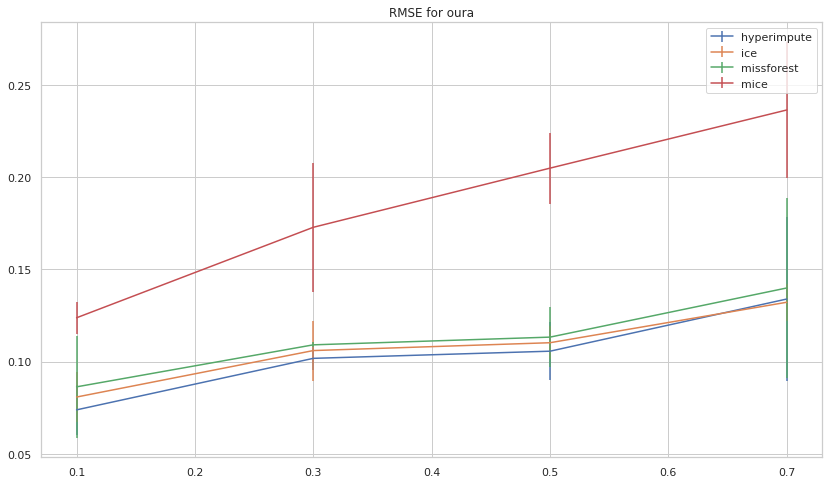

In [30]:
result_lst[0]
import seaborn as sns
import matplotlib.pyplot as plt



# for col in rmse_oura.columns.to_list():
#     if col != 'Scenario' and 'miss_pct' not in col:
#         new_col = col
#         if ":" in col:
#             new_col = col.split(":")[1]
#         rmse_oura[new_col + '_sd'] = rmse_oura[col].apply(lambda x: x[1])
#         rmse_oura[new_col + '_mean'] = rmse_oura[col].apply(lambda x: x[0])
def reshape_hyperimpute_output(rmse_oura):
    rmse_oura = rmse_oura.rename(columns = {'Evaluated: hyperimpute':'hyperimpute'})
    rmse_oura=rmse_oura.melt(id_vars=['Scenario', 'miss_pct [0, 1]'], var_name="Model", value_name="value")
    rmse_oura['mean'] = rmse_oura['value'].apply(lambda x: x[0])
    rmse_oura['sd'] = rmse_oura['value'].apply(lambda x: x[1])
    return rmse_oura
#rmse_oura.pivot_table()
def plot_missingness_performance(rmse_oura, title):
    fig,ax = plt.subplots(figsize=(14,8))
    sns.set(style= "whitegrid")
    lvls = rmse_oura.Model.unique()
    for i in lvls:
        ax.errorbar(x = rmse_oura[rmse_oura['Model']==i]["miss_pct [0, 1]"],
                    y=rmse_oura[rmse_oura['Model']==i]["mean"], 
                    yerr=rmse_oura[rmse_oura['Model']==i]["sd"],label=i)
    ax.legend()
    ax.set_title(title)
    fig.show()
rmse_oura = pd.DataFrame(result_lst[0]['rmse'], columns=result_lst[0]['headers'])
rmse_oura = reshape_hyperimpute_output(rmse_oura)
plot_missingness_performance(rmse_oura, "RMSE for oura")

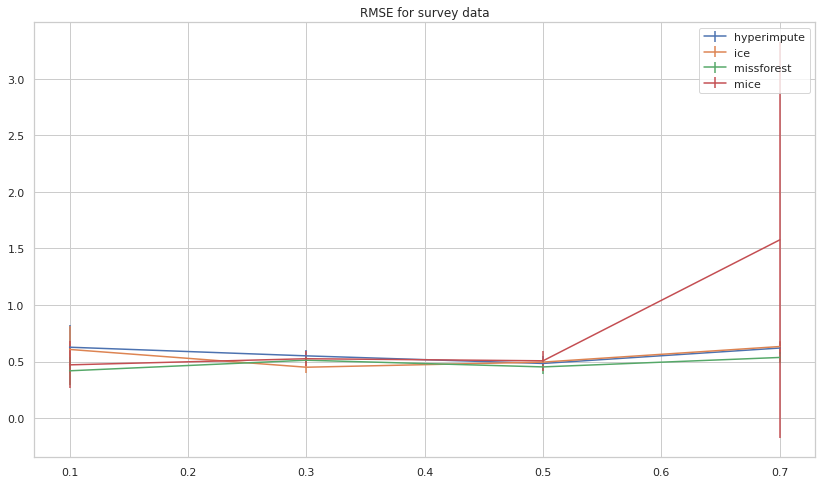

In [32]:
rmse_survey = pd.DataFrame(result_lst[1]['rmse'], columns=result_lst[1]['headers'])
rmse_survey = reshape_hyperimpute_output(rmse_survey)
plot_missingness_performance(rmse_survey, "RMSE for survey data")

In [1]:
import os
import pandas as pd
oura_df_list = []
for f in os.listdir('./dataset'):
    if 'oura' in f:
        subset_df = pd.read_csv(os.path.join('.', 'dataset', f))
        
        oura_df_list.append(subset_df)
combined_oura_df = pd.concat(oura_df_list, ignore_index=True)
combined_oura_df = combined_oura_df.loc[:, ~combined_oura_df.columns.str.contains('^Unnamed')]
combined_oura_df.to_csv(os.path.join('.', 'dataset', 'combined_oura.csv'), index=False)
combined_oura_df

,hr_lowest,hr_average,rmssd,score_deep,temperature_deviation,temperature_trend_deviation,temperature_delta,duration,rem,efficiency,...,score_rem,light,onset_latency,restless,breath_average,score_disturbances,score,score_efficiency,score_latency,score_total
0,67.0,75.11,29.0,96,-0.07,0.04,-0.07,36060.0,7620.0,91.0,...,97,19230.0,840.0,33.0,13.000,76,95,97,97,100
1,70.0,76.33,26.0,73,0.06,0.07,0.06,32160.0,5160.0,84.0,...,74,17910.0,810.0,42.0,13.250,72,82,81,97,82
2,66.0,77.21,29.0,84,-0.20,0.00,-0.20,35820.0,6990.0,78.0,...,96,16530.0,420.0,30.0,13.125,70,83,67,78,86
3,67.0,75.01,31.0,96,0.00,0.00,0.00,37380.0,8580.0,87.0,...,99,18330.0,420.0,39.0,13.625,76,93,88,78,100
4,71.0,77.70,28.0,43,0.11,0.07,0.11,33720.0,5850.0,77.0,...,85,17670.0,3660.0,44.0,12.750,60,67,65,10,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,70.0,77.31,17.0,54,-0.17,0.20,-0.17,32700.0,9210.0,92.0,...,100,17910.0,240.0,30.0,16.375,77,82,97,70,94
189,71.0,77.52,18.0,62,0.07,0.16,0.07,26640.0,5580.0,94.0,...,79,15810.0,660.0,27.0,15.750,76,77,99,89,73
190,64.0,71.18,27.0,96,-0.03,0.07,-0.03,33960.0,8670.0,92.0,...,99,16920.0,390.0,25.0,15.000,76,88,97,78,97
191,64.0,71.48,30.0,78,-0.21,0.00,-0.21,30900.0,8610.0,92.0,...,99,15450.0,690.0,32.0,15.250,83,87,97,91,87


In [ ]:
pd.read_csv('./dataset/user_581_survey_data.csv')